# Data Cleaning, Saving & Loading

**Cleaned Automobile Dataset Dataset Overview:**
The cleaned automobile dataset is derived from the UCI Machine Learning Repository's ["Automobile Data Set."](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) This dataset contains various continuous features related to automobile specifications and a target variable (price) representing the price of the car.

**File Details:**
* File Name: cleaned_automobile_data.pt
* File Format: PyTorch .pt file (serialized dictionary)
* Size: Varies based on the number of valid observations.
* Contents of the File:
* The .pt file contains the following keys:

* features: PyTorch tensor of shape (n_samples, 13)
* Description: Continuous numerical features related to automobile characteristics.
* target: PyTorch tensor of shape (n_samples, 1)
* Description: Price of the automobile (target variable).
* feature_names: List of strings (length 13)
* Description: Names of the feature columns:['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
* target_name: String
* Description: Name of the target variable (price).

**Data Cleaning Details:**
* Missing Values Handling: Rows with missing values for any of the 13 continuous features or price were removed.
* Continuous Features: Only continuous features relevant to car specifications are retained.
* Target Variable: The price column was cleaned and reshaped for use in regression tasks.
* Dataset Shape: After cleaning, the dataset contains approximately 195 samples

In [1]:
import random
random.seed(2000)
import numpy as np
import pandas as pd
import torch
import requests

#-|Step-1: Cleaning and saving the cleaned dataset
def clean_and_save_dataset():
    """
    Download, clean, and save the UCI Automobile dataset as a PyTorch .pt file.
    """
    #-|Download the dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
    columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
               'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height',
               'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
               'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
    
    data = pd.read_csv(url, names=columns, na_values="?")  # NaN for missing values

    #-|Continuous features and target variable
    continuous_features = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
                            'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

    # Drop rows with missing values in relevant columns
    cleaned_data = data.dropna(subset=continuous_features + ['price'])
    cleaned_data = cleaned_data[continuous_features + ['price']]  # Keep only continuous features and target variable

    print(f"Cleaned dataset size: {cleaned_data.shape}")

    # Convert dataframe to PyTorch tensors
    features_tensor = torch.tensor(cleaned_data.drop(columns=['price']).values, dtype=torch.float32)
    target_tensor = torch.tensor(cleaned_data['price'].values.reshape(-1, 1), dtype=torch.float32)

    # Save cleaned data as a PyTorch .pt file with column names
    dataset = {
        "features": features_tensor,
        "target": target_tensor,
        "feature_names": continuous_features,
        "target_name": "price"
    }
    torch.save(dataset, "cleaned_automobile_data.pt")
    print("Saved cleaned dataset as 'cleaned_automobile_data.pt'")


#-|Step-2: Loading the dataset === #
def load_dataset(file_path):
    """
    Load the saved PyTorch .pt dataset from the given file path.
    """
    dataset = torch.load(file_path)
    print("Loaded dataset successfully!")
    print(f"Features shape: {dataset['features'].shape}, Target shape: {dataset['target'].shape}")
    print(f"Feature Names: {dataset['feature_names']}, Target Name: {dataset['target_name']}")
    return dataset["features"], dataset["target"], dataset["feature_names"], dataset["target_name"]



#-| Step-3: Convert tensors to DataFrame
def make_dataframe_from_tensors(features, target, feature_names, target_name):
    """
    Convert PyTorch tensors for features and target into a Pandas DataFrame.
    """
    # Convert tensors to numpy arrays for DataFrame conversion
    features_np = features.numpy()
    target_np = target.numpy().flatten()  # Flatten target to 1D array for DataFrame

    # Create a DataFrame with feature columns and target
    df = pd.DataFrame(features_np, columns=feature_names)
    df[target_name] = target_np  # Add target column

    return df

if __name__ == "__main__":
    # Step 1: Clean and save the dataset locally
    clean_and_save_dataset()

    # Step 2: Load the dataset and display information
    features, target, feature_names, target_name = load_dataset("cleaned_automobile_data.pt")
    print(f"First 5 rows of features:\n{features[:2]}")
    print(f"First 5 rows of target:\n{target[:2]}")
    
    # Step 3: Create a DataFrame from the loaded dataset
    df = make_dataframe_from_tensors(features, target, feature_names, target_name)
    print("\nFirst 5 rows of the dataset as a DataFrame:")
    print(df.head())


Cleaned dataset size: (195, 14)
Saved cleaned dataset as 'cleaned_automobile_data.pt'
Loaded dataset successfully!
Features shape: torch.Size([195, 13]), Target shape: torch.Size([195, 1])
Feature Names: ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'], Target Name: price
First 5 rows of features:
tensor([[8.8600e+01, 1.6880e+02, 6.4100e+01, 4.8800e+01, 2.5480e+03, 1.3000e+02,
         3.4700e+00, 2.6800e+00, 9.0000e+00, 1.1100e+02, 5.0000e+03, 2.1000e+01,
         2.7000e+01],
        [8.8600e+01, 1.6880e+02, 6.4100e+01, 4.8800e+01, 2.5480e+03, 1.3000e+02,
         3.4700e+00, 2.6800e+00, 9.0000e+00, 1.1100e+02, 5.0000e+03, 2.1000e+01,
         2.7000e+01]])
First 5 rows of target:
tensor([[13495.],
        [16500.]])

First 5 rows of the dataset as a DataFrame:
   wheel-base      length      width     height  curb-weight  engine-size  \
0   88.599998  168.800003  64.09

## Making train and test split

In [2]:
#-|Step-1 Required python libraries
import random
SEED = 2000
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
random.seed(SEED)             # Python random seed
np.random.seed(SEED)          # NumPy random seed
torch.manual_seed(SEED)       # PyTorch random seed
torch.cuda.manual_seed(SEED)  # PyTorch seed for GPU (if using CUDA)
torch.backends.cudnn.deterministic = True   # Make CUDA deterministic
torch.backends.cudnn.benchmark     = False  # Disable autotuning for reproducibility

#-|Step-2: Dataset Loading and Train test split,
file_path                                    = "cleaned_automobile_data.pt"  # Change to your local file path
features, target, feature_names, target_name = load_dataset(file_path)
#Convert data to torch tensors
features                                     = torch.tensor(features, dtype=torch.float32)
target                                       = torch.tensor(target, dtype=torch.float32).view(-1, 1)
#Split into training and testing sets
X_train, X_test, y_train, y_test             = train_test_split(features, target, test_size=0.2, random_state=42)



train_data = {
        "features": X_train,
        "target": y_train,
        "feature_names": feature_names,
        "target_name": target_name}
test_data = {
        "features": X_test,
        "target": y_test,
        "feature_names": feature_names,
        "target_name": target_name
    }

torch.save(train_data, "cleaned_automobile_train_dataset.pt")
torch.save(test_data, "cleaned_automobile_test_dataset.pt")

print("Saved training dataset as 'cleaned_automobile_train_dataset.pt'")
print("Saved testing dataset as 'cleaned_automobile_test_dataset'")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Loaded dataset successfully!
Features shape: torch.Size([195, 13]), Target shape: torch.Size([195, 1])
Feature Names: ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'], Target Name: price
Saved training dataset as 'cleaned_automobile_train_dataset.pt'
Saved testing dataset as 'cleaned_automobile_test_dataset'


/tmp/ipykernel_29542/2008786942.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features                                     = torch.tensor(features, dtype=torch.float32)
/tmp/ipykernel_29542/2008786942.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target                                       = torch.tensor(target, dtype=torch.float32).view(-1, 1)


## Scatter plots

**Question # 1(c)**
For each of the 13 features, explain, based on your scatter plots, why you believe that feature holds
promise for predicting a car’s price, or why you believe it does not hold promise for predicting
a car’s price. You may notice that for some features there appears to be a nonlinear relationship between the feature and the car’s price. For example, price = feature2, or price = 1/feature. Keep
this in mind when you propose candidate models for predicting a car’s price. (There should be
13 explanations, one for each feature.)

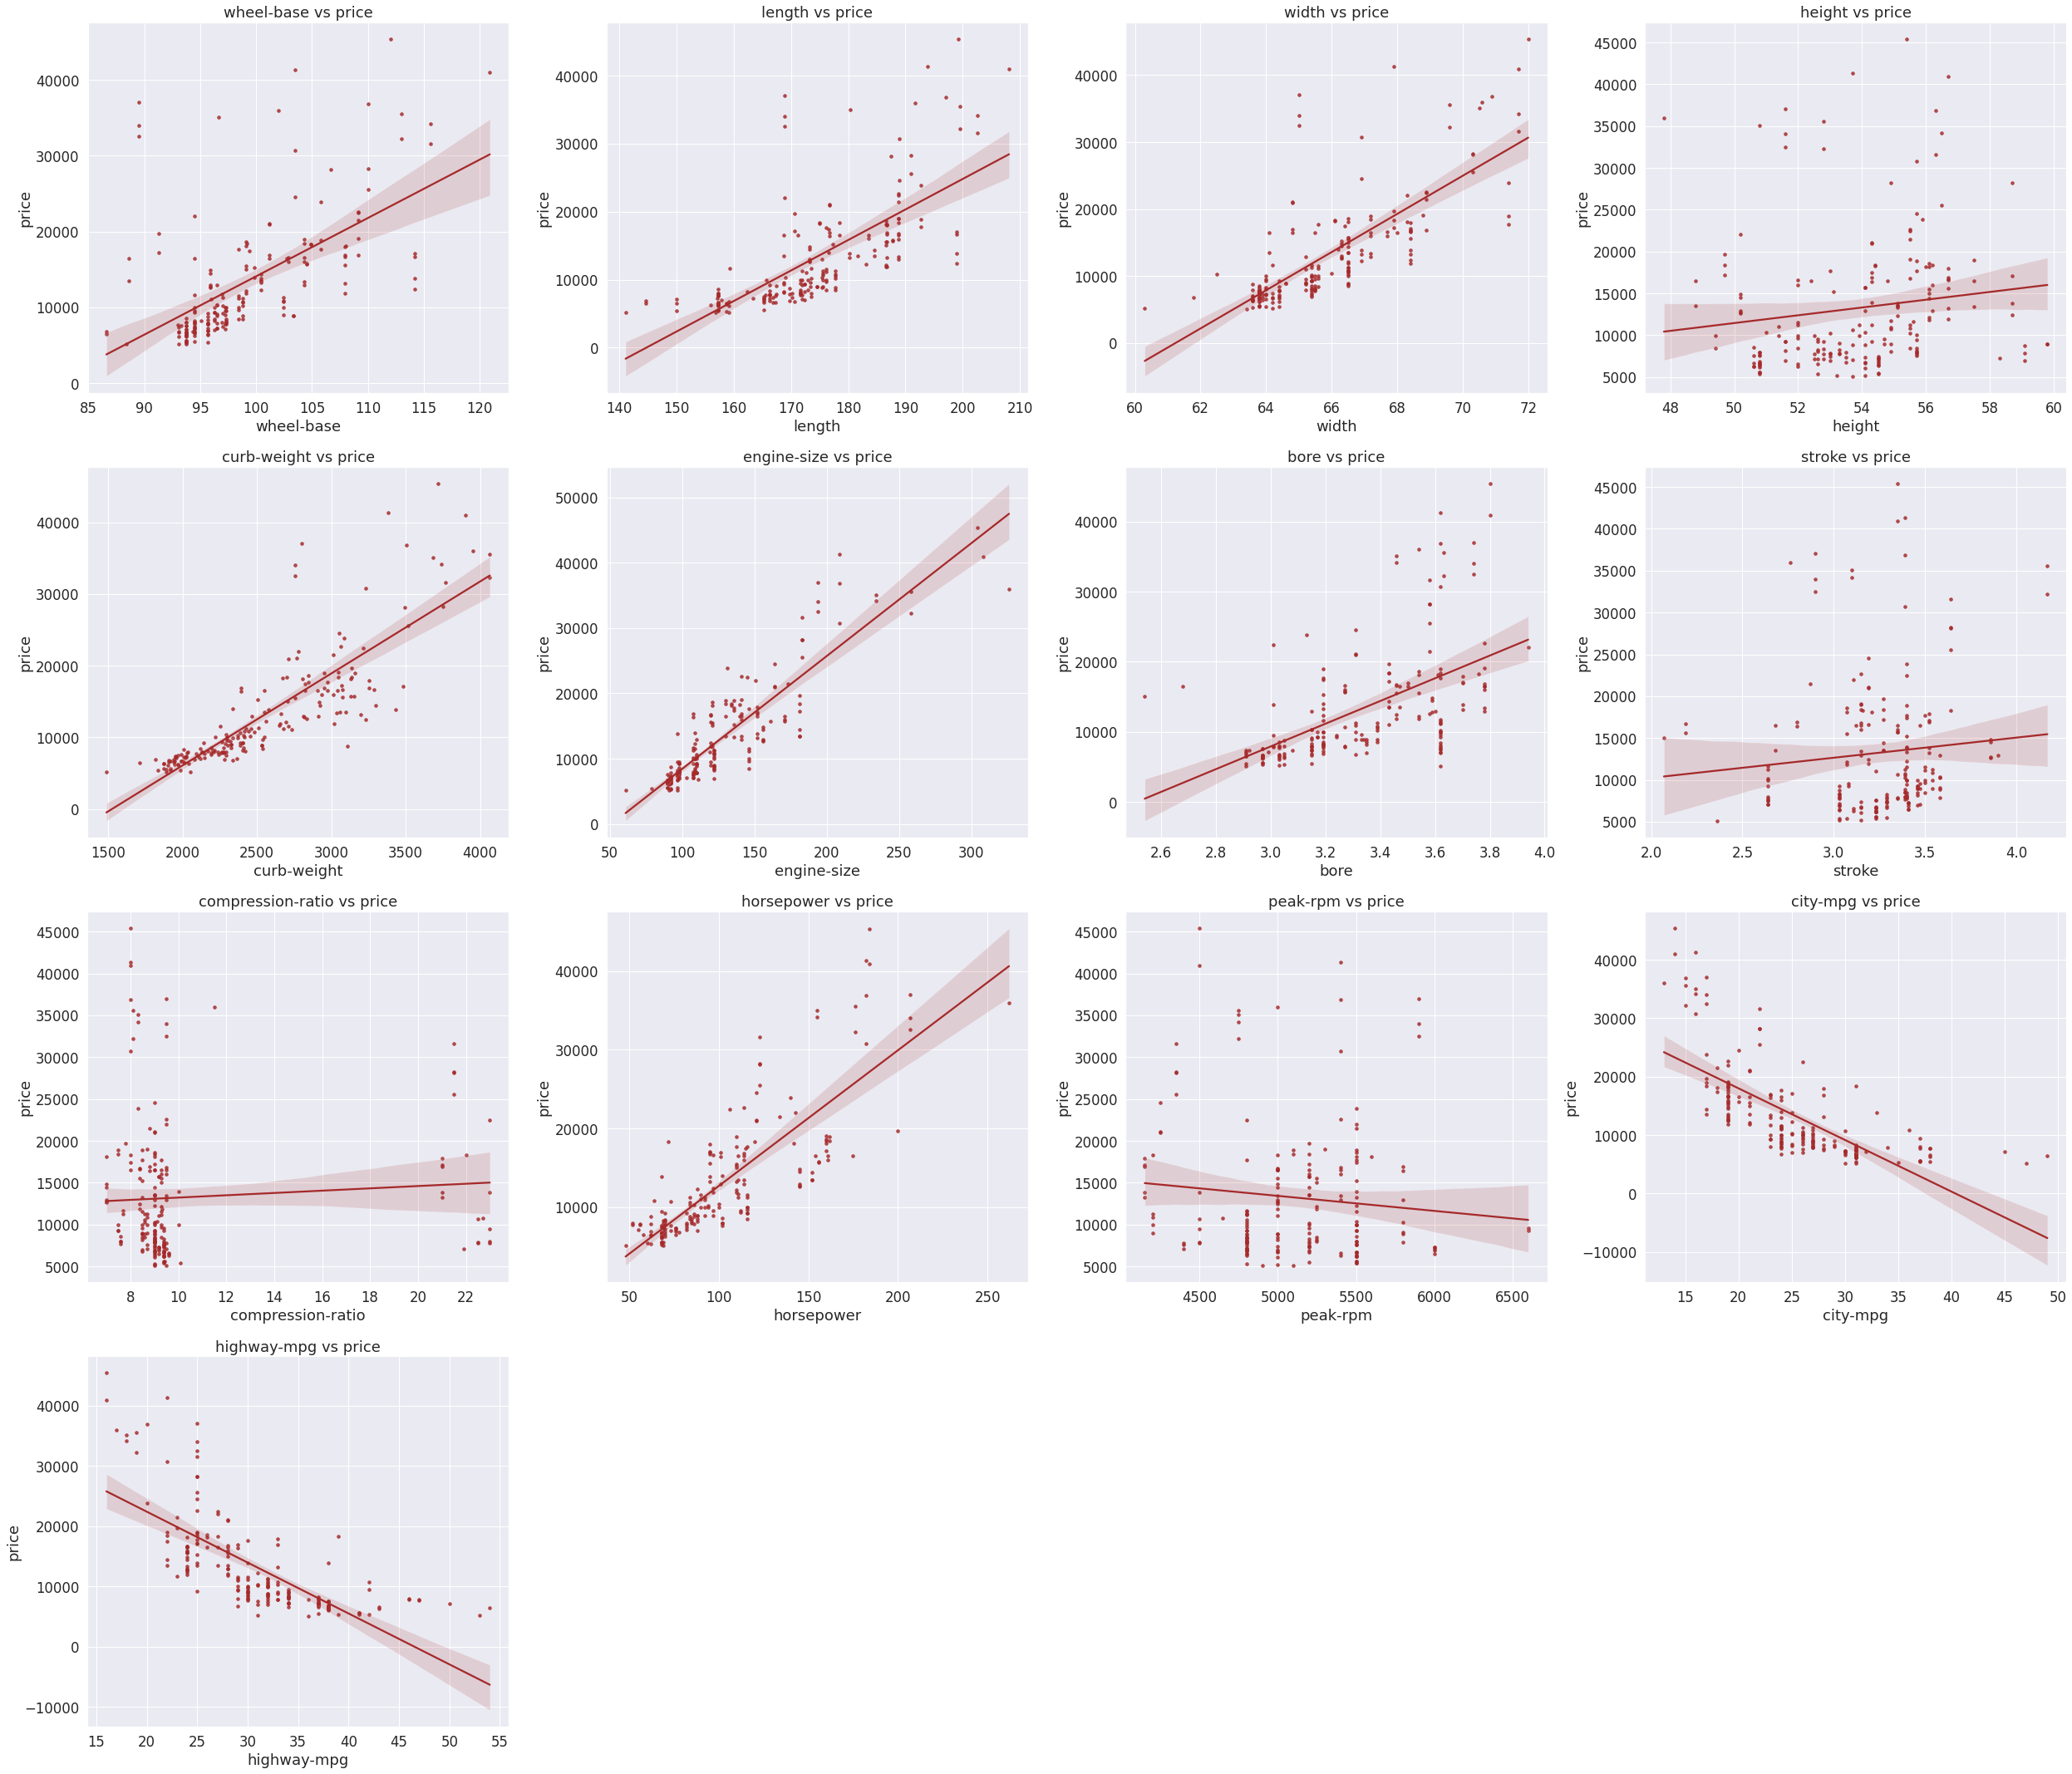

In [3]:
#-- Function
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_PV_vs_Target_plots_from_df(roi_df,target_variable_name,number_of_colums,fig_size,fig_save_name='fig.png',save_fig=False):
    """
    inputs: a) roi_df = dataframe ; dtype:
    dataframe object)
    b) target_variable_name = Name of the target column; dtype:
    string
    c) number_of_colums = Number of columns you want in a subplot; d
    type: int
    4) fig_size = Define the size of the figure; d
    type: (int,int)
    5)fig_save_name = if saving the figute provide name; d
    type: string
    6)save_fig = save fig or no; d
    type: bool
    """
    # getting column/predictive variable names from the df
    name_of_predictive_variable = roi_df.columns.values.tolist()
    # removing the target variable name from the column list
    name_of_predictive_variable.remove(target_variable_name)
    #Computing the Sub-plot size
    number_of_predictive_variables = len(name_of_predictive_variable)
    subplot_number_of_colums = number_of_colums
    subplot_number_of_rows = math.ceil(number_of_predictive_variables/subplot_number_of_colums)
    sns.set(font_scale=1.5)
    # Subplot
    fig = plt.figure(figsize=fig_size)
    # loop through each of the subplot location and plot predictive Vs target variable
    for subplot_count in range(0,number_of_predictive_variables):
        ax = fig.add_subplot(subplot_number_of_rows, subplot_number_of_colums, subplot_count+1)
        sns.regplot(x=name_of_predictive_variable[subplot_count], y=target_variable_name, data=roi_df, color='brown', marker='.', scatter_kws={'s': 50},ax=ax)
        ax.set_title('{} vs price'.format(name_of_predictive_variable[subplot_count]))
    plt.tight_layout()
    #-if saving the figure
    if save_fig:
        plt.savefig(fig_save_name,bbox_inches="tight",dpi=300)
        files.download(fig_save_name)
        plt.show()
    return


plot_PV_vs_Target_plots_from_df(roi_df=df,target_variable_name='price',number_of_colums=4,fig_size=(35,30),fig_save_name='Automobile_dataset_13predictiveFeatures_Vs_price.png',save_fig=False)



**Answer:** Features relation to price listed below.


1.   **"wheel-base" and "price":** **Medium positive relation.** As we can see when the wheel-base goes high up, the prices also goes up. The points are not tightly but in wide spread position that is why , wheel-base could be a potential predictor of price.

2. **"length" and "price":** **Medium positive relation.** As we can see when the length goes high up, the prices also goes up. Although the points on the scatter plot are not as tightly spread to form a strong positive linear relation. length could be a potential predictor of price.

3. **"width" and "price":** **Medium positive relation.** Similar to length, we can see when the width goes high up, the prices also goes up. Although the points on the scatter plot are not as tightly spread to form a strong positive linear relation. width could be a potential predictor of price.

4. **"height" and "price":** **No relation.** As we can see the regression line is almost a horizontal line, which indicates no variation in prices when the height goes up. height is not a  predictor of price.

5. **"curb-weight" and "price":** **Strong positive relation.** As we can see as curb-weight goes up, the price also goes up, and majority of the points are tightly aligned. All these make curb-weight a pretty good predictor of price. 

6. **"engine-size" and "price":** **Strong positive relation.** Similar to curb-weight, we can see as engine-size goes up, the price also goes up, and majority of the points are tightly aligned. All these make engine-size a pretty good predictor of price.

7. **"bore" and "price":** **Medium positive relation.** Similar to length, we can see when the bore goes high up, the prices also goes up.Although the points on the scatter plot are not as tightly spread to form a strong positive linear relation. bore could be a potential predictor of price.

8. **"stroke" and "price":** **No relation.**As we can see the regression line is almost a horizontal line, which indicates no variation in prices when the height goes up. stroke is not a  predictor of price.

9. **"compression-ratio" and "price":** **No relation.**As we can see the regression line is almost a horizontal line, which indicates no variation in prices when the height goes up. compression-ratio is not a  predictor of price.

10. **"horsepower" and "price":** **Strong positive relation.**Similar to curb-weight, we can see as horsepower goes up, the price also goes up, and majority of the points are tightly aligned. All these make horsepower a pretty good predictor of price.

11. **"peak-rpm" and "price":** **No relation.**As we can see the regression line is almost a horizontal line, which indicates no variation in prices when the height goes up. peak-rpm is not a  predictor of price.

12. **"city-mpg" and "price":** **Medium negative relation.** As we can see when the city-mpg goes high up, the prices goes down.Although the points on the scatter plot are not as tightly spread to form a strong negative linear relation. width could be a potential predictor of price.

13. **"highway-mpg" and "price":** **Medium negative relation.** As we can see when the highway-mpg goes high up, the prices goes down.Although the points on the scatter plot are not as tightly spread to form a strong negative linear relation. width could be a potential predictor of price.

## Pairplots



When performing regression, it is preferable to have features that are as independent as possible,
as strongly related (correlated) features do not provide much additional information and
may lead to computational challenges. For example, if there were two additional continuous
features, “km per gallon city” and “km per gallon highway”, these features would be highly (perfectly?)
correlated with the existing features “city-mpg” and “highway-mpg,” respectively, because
1 km = 0.6241 miles. For this reason, we would want to include only one of “km per gallon
city” and “city-mpg” in our model, and only one of “km per gallon highway” and “highway-mpg”
in our model.
Plot each pair-wise combination of features using scatter plots to aid in (visually) identifying
features that are related (correlated).4 (There will be a lot of plots. Write code (or leverage a
package) to do the heavy, repetitive, lifing for you!) Since you are using these plots to identify
correlation trends the plots do not need to be high-resolution, so it is ok if the plots are “small”.

<Figure size 2160x2160 with 0 Axes>

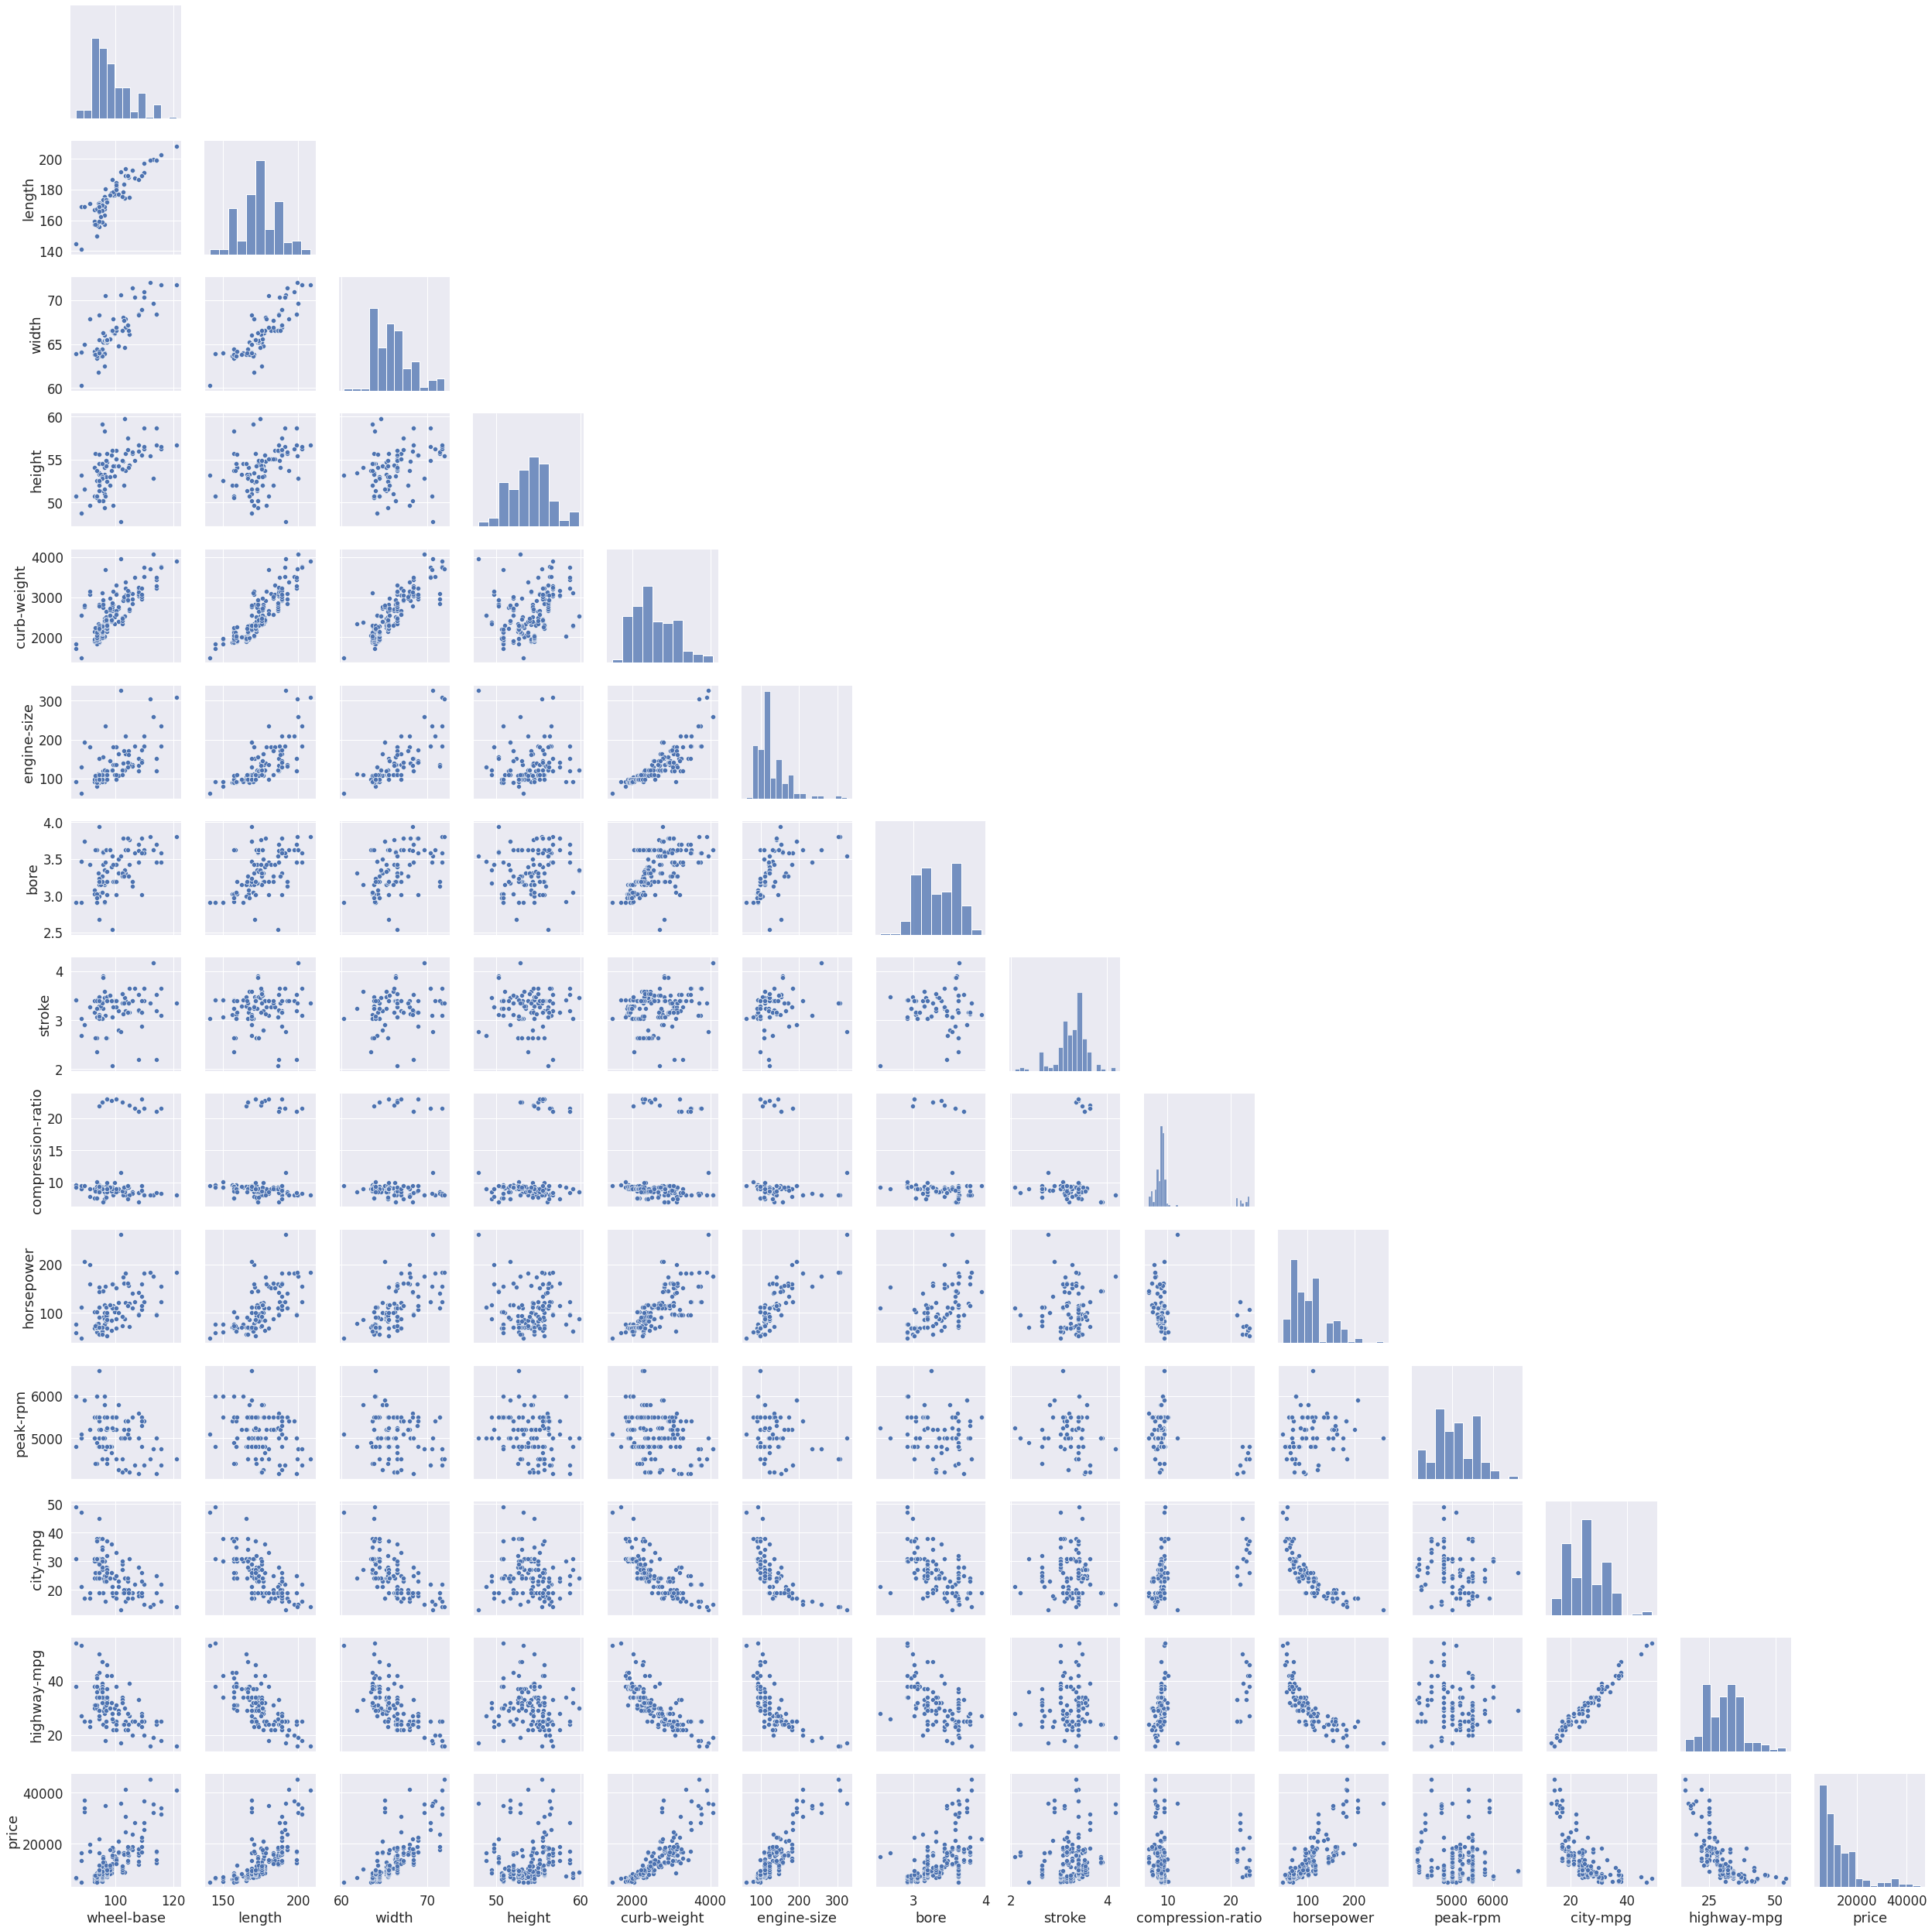

In [4]:
# for this task we will be using a function "seaborn.pairplot" from seaborn python libarary (ref:https://seaborn.pydata.org/generated/seaborn.pairplot.html)
fig = plt.figure(figsize=(30,30)) #defining figure sive
sns.pairplot(df,corner=True) #ploting
plt.tight_layout()
#plt.savefig('Features_pairplot.png',bbox_inches="tight",dpi=300)
#files.download('Features_pairplot.png')
plt.show()

**Question 1(e)**

Identify, based on your pair-wise scatter plots, variables that are related and preferably would
not both (or all) be used in the model simultaneously.

**Answer:** Identifing,variables that are related and preferably would not both (or all) be used in the model simultaneously.

1.**wheel-base:**        
*   **Strong Postive relation** (*Recommended not to use both simultaneoughly in the same model*): **length, width, curb-weight.** 
*   **Medium Positive relation** (could consider using simultaneoughly in the same model) : height,bore
*   **Medium Negatibe relation** (could consider using simultaneoughly in the same model) : city-mpg, highway-mpg


2.**length:**
*   **Strong Postive relation** : wheel-base, width,curb-weight.
*   **Medium Positive relation** : engine-size, bore,horsepower
*   **Medium Negatibe relation** : city-mpg, highway-mpg


3.**weight:**
*   **Strong Postive relation** : wheel-base, length,curb-weight.
*   **Medium Positive relation** : engine-size, bore,horsepower
*   **Medium Negatibe relation** : city-mpg, highway-mpg

4.**curb-weight:**
*   **Strong Postive relation** : wheel-base, length,weight,engine-size.
*   **Medium Positive relation** : bore,horsepower
*   **Strong Negatibe relation**(*Recommended not to use both simultaneoughly in the same model*) : city-mpg, highway-mpg

5.**engine-size:**
*   **Strong Postive relation** :  curb-weight,horsepower
*   **Medium Positive relation** : wheel-base, length,weight,bore
*   **Medium Negatibe relation** : city-mpg, highway-mpg

6.**horsepower:**
*   **Strong Postive relation** : engine-size.
*   **Medium Positive relation** : bore,length,weight,curb-weight.
*   **Strong Negatibe relation**: city-mpg, highway-mpg

7.**city-mpg:**
*   **Strong Postive relation** : highway-mpg.
*   **Medium Positive relation** : bore,length,weight,curb-weight,engine-size.
*   **Strong Negatibe relation**: horsepower.

7.**highway-mpg:**
*   **Strong Postive relation** : city-mpg.
*   **Medium Positive relation** : bore,length,weight,curb-weight,engine-size.
*   **Strong Negatibe relation**: horsepower.



# Naive Linear classifier

In [5]:
#-|Step-1 Required python libraries
import random
SEED = 2000
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
random.seed(SEED)             # Python random seed
np.random.seed(SEED)          # NumPy random seed
torch.manual_seed(SEED)       # PyTorch random seed
torch.cuda.manual_seed(SEED)  # PyTorch seed for GPU (if using CUDA)
torch.backends.cudnn.deterministic = True   # Make CUDA deterministic
torch.backends.cudnn.benchmark     = False  # Disable autotuning for reproducibility

##-Data loading function
def load_dataset(file_path):
    """
    Load the saved PyTorch .pt dataset from the given file path.
    """
    dataset = torch.load(file_path)
    print("Loaded dataset successfully!")
    print(f"Features shape: {dataset['features'].shape}, Target shape: {dataset['target'].shape}")
    print(f"Feature Names: {dataset['feature_names']}, Target Name: {dataset['target_name']}")
    return dataset["features"], dataset["target"], dataset["feature_names"], dataset["target_name"]


#-|Step-1: Dataset Loading and Train test split,
train_file_path                               = "cleaned_automobile_train_dataset.pt"  # Change to your local file path
X_train, y_train, feature_names, y_train_name = load_dataset(train_file_path)
#Convert data to torch tensors
X_train                                       = torch.tensor(X_train, dtype=torch.float32)
y_train                                       = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)



#-|Step-2: Dataset Loading and test test split,
test_file_path                             = "cleaned_automobile_test_dataset.pt"  # Change to your local file path
X_test, y_test, feature_names, y_test_name = load_dataset(test_file_path)
#Convert data to torch tensors
X_test                                       = torch.tensor(X_test, dtype=torch.float32)
y_test                                       = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)



#-|Step-3 Defining linear model in pytorch 
class NaiveLinearModel(nn.Module):
    def __init__(self, input_dim):
        super(NaiveLinearModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

#-|Step-4 Hyperparameter grid
learning_rates    = [0.01,0.1]
epoch_options     = [5000,10000,20000]
best_r2           = -float('inf')
best_model_params = None


#-| Looping over the Hyperparameter grid
for lr in learning_rates:
    for num_epochs in epoch_options:
        print(f"\nTraining with learning rate {lr} and epochs {num_epochs}...")

        #Reinitialize the model for each combination
        model     = NaiveLinearModel(X_train.shape[1])
        optimizer = optim.Adam(model.parameters(), lr=lr)
        loss_fn   = nn.MSELoss()

        #Training loop for the current hyperparameter combination
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()
            predictions = model(X_train)
            loss = loss_fn(predictions, y_train)
            loss.backward()
            optimizer.step()

        #Evaluate R^2 score
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test)
            ss_res = ((y_test - y_pred) ** 2).sum().item()
            ss_tot = ((y_test - y_test.mean()) ** 2).sum().item()
            r2_score = 1 - (ss_res / ss_tot)

        print(f"R^2 Score: {r2_score:.2f}")


        # Track the best model
        if r2_score > best_r2:
            best_r2 = r2_score
            best_model_params = (lr, num_epochs)

print(f"\nBest R^2 Score: {best_r2:.2f} with learning rate {best_model_params[0]} and epochs {best_model_params[1]}")


Loaded dataset successfully!
Features shape: torch.Size([156, 13]), Target shape: torch.Size([156, 1])
Feature Names: ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'], Target Name: price
Loaded dataset successfully!
Features shape: torch.Size([39, 13]), Target shape: torch.Size([39, 1])
Feature Names: ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'], Target Name: price

Training with learning rate 0.01 and epochs 5000...


/tmp/ipykernel_29542/1859280210.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train                                       = torch.tensor(X_train, dtype=torch.float32)
/tmp/ipykernel_29542/1859280210.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train                                       = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
/tmp/ipykernel_29542/1859280210.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test                                       = torch.tensor(X_test, dtype=torch.float32)
/tmp/i

R^2 Score: 0.68

Training with learning rate 0.01 and epochs 10000...
R^2 Score: 0.79

Training with learning rate 0.01 and epochs 20000...
R^2 Score: 0.82

Training with learning rate 0.1 and epochs 5000...
R^2 Score: 0.80

Training with learning rate 0.1 and epochs 10000...
R^2 Score: 0.81

Training with learning rate 0.1 and epochs 20000...
R^2 Score: 0.82

Best R^2 Score: 0.82 with learning rate 0.1 and epochs 20000


## Best R^2 Score: 0.83 with learning rate 0.1 and epochs 40000

In [6]:
#-|Step-1 Required python libraries
import random
SEED = 2000
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
random.seed(SEED)             # Python random seed
np.random.seed(SEED)          # NumPy random seed
torch.manual_seed(SEED)       # PyTorch random seed
torch.cuda.manual_seed(SEED)  # PyTorch seed for GPU (if using CUDA)
torch.backends.cudnn.deterministic = True   # Make CUDA deterministic
torch.backends.cudnn.benchmark     = False  # Disable autotuning for reproducibility

##-Data loading function
def load_dataset(file_path):
    """
    Load the saved PyTorch .pt dataset from the given file path.
    """
    dataset = torch.load(file_path)
    print("Loaded dataset successfully!")
    print(f"Features shape: {dataset['features'].shape}, Target shape: {dataset['target'].shape}")
    print(f"Feature Names: {dataset['feature_names']}, Target Name: {dataset['target_name']}")
    return dataset["features"], dataset["target"], dataset["feature_names"], dataset["target_name"]


#-|Step-1: Dataset Loading and Train test split,
train_file_path                               = "cleaned_automobile_train_dataset.pt"  # Change to your local file path
X_train, y_train, feature_names, y_train_name = load_dataset(train_file_path)
#Convert data to torch tensors
X_train                                       = torch.tensor(X_train, dtype=torch.float32)
y_train                                       = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)



#-|Step-2: Dataset Loading and test test split,
test_file_path                             = "cleaned_automobile_test_dataset.pt"  # Change to your local file path
X_test, y_test, feature_names, y_test_name = load_dataset(test_file_path)
#Convert data to torch tensors
X_test                                       = torch.tensor(X_test, dtype=torch.float32)
y_test                                       = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)




#-|Step-3 Defining linear model in pytorch 
class NaiveLinearModel(nn.Module):
    def __init__(self, input_dim):
        super(NaiveLinearModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

#-|Step-4 Initialize naive linear model and training
naive_model = NaiveLinearModel(X_train.shape[1])
loss_fn     = nn.MSELoss()
optimizer   = optim.Adam(naive_model.parameters(), lr=0.1)
epochs      = 40000

#-|Step-5 Training loop
for epoch in range(epochs):
    naive_model.train()
    optimizer.zero_grad()
    predictions = naive_model(X_train)
    loss        = loss_fn(predictions, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Naive Model Loss: {loss.item():.2f}')

#-|Step-6 Evaluate R^2 for naive model
naive_model.eval()
with torch.no_grad():
    y_pred = naive_model(X_test)
    ss_res = ((y_test - y_pred) ** 2).sum().item()         # Residual sum of squares
    ss_tot = ((y_test - y_test.mean()) ** 2).sum().item()  # Total sum of squares
    r2_naive = 1 - (ss_res / ss_tot)
    print(f"Naive model R^2: {r2_naive:.2f}")
    print(f"The for this model R^2 is:{r2_naive:.2f} . It means {r2_naive*100:.2f}% variation of the price is explained by this linear regression")
    # Calculate Mean Squared Error (MSE)
    mse_naive = 1-r2_naive # Mean of squared differences
    print(f"Naive model MSE: {mse_naive:.2f}")

Loaded dataset successfully!
Features shape: torch.Size([156, 13]), Target shape: torch.Size([156, 1])
Feature Names: ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'], Target Name: price
Loaded dataset successfully!
Features shape: torch.Size([39, 13]), Target shape: torch.Size([39, 1])
Feature Names: ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'], Target Name: price


/tmp/ipykernel_29542/1012396855.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train                                       = torch.tensor(X_train, dtype=torch.float32)
/tmp/ipykernel_29542/1012396855.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train                                       = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
/tmp/ipykernel_29542/1012396855.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test                                       = torch.tensor(X_test, dtype=torch.float32)
/tmp/i

Epoch [5000/40000], Naive Model Loss: 9319870.00
Epoch [10000/40000], Naive Model Loss: 8848542.00
Epoch [15000/40000], Naive Model Loss: 8614349.00
Epoch [20000/40000], Naive Model Loss: 8431771.00
Epoch [25000/40000], Naive Model Loss: 8313908.50
Epoch [30000/40000], Naive Model Loss: 8235850.50
Epoch [35000/40000], Naive Model Loss: 8205050.50
Epoch [40000/40000], Naive Model Loss: 8160684.50
Naive model R^2: 0.83
The for this model R^2 is:0.83 . It means 83.23% variation of the price is explained by this linear regression
Naive model MSE: 0.17


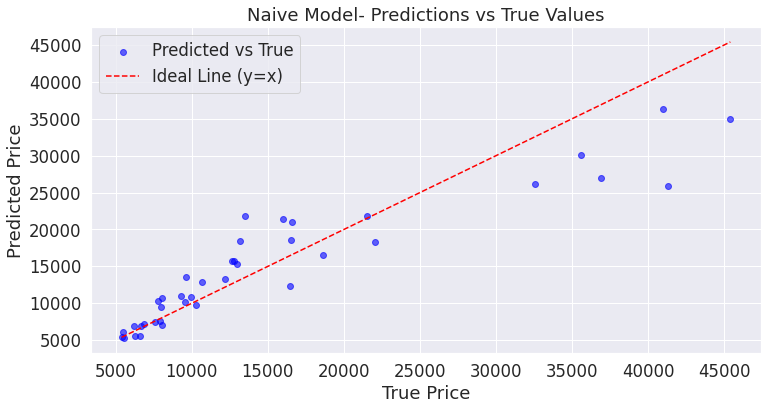

In [7]:
import matplotlib.pyplot as plt



# Convert tensors to numpy for plotting
y_test_np = y_test.cpu().numpy().flatten()
y_pred_np = y_pred.cpu().numpy().flatten()

# Plot the true vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test_np, y_pred_np, alpha=0.6, color='blue', label='Predicted vs True')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], color='red', linestyle='--', label='Ideal Line (y=x)')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title(f'Naive Model- Predictions vs True Values')
plt.legend()
plt.grid(True)
plt.show()

# Multi-nomial

In [8]:
#-|Step-1 Required python libraries
import random
SEED = 2000
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from math import comb  # For calculating number of combinations
from itertools import combinations_with_replacement, product
random.seed(SEED)             # Python random seed
np.random.seed(SEED)          # NumPy random seed
torch.manual_seed(SEED)       # PyTorch random seed
torch.cuda.manual_seed(SEED)  # PyTorch seed for GPU (if using CUDA)
torch.backends.cudnn.deterministic = True   # Make CUDA deterministic
torch.backends.cudnn.benchmark     = False  # Disable autotuning for reproducibility

##-Data loading function
def load_dataset(file_path):
    """
    Load the saved PyTorch .pt dataset from the given file path.
    """
    dataset = torch.load(file_path)
    print("Loaded dataset successfully!")
    print(f"Features shape: {dataset['features'].shape}, Target shape: {dataset['target'].shape}")
    print(f"Feature Names: {dataset['feature_names']}, Target Name: {dataset['target_name']}")
    return dataset["features"], dataset["target"], dataset["feature_names"], dataset["target_name"]


#-|Step-1: Dataset Loading and Train test split,
train_file_path                               = "cleaned_automobile_train_dataset.pt"  # Change to your local file path
X_train, y_train, feature_names, y_train_name = load_dataset(train_file_path)
#Convert data to torch tensors
X_train                                       = torch.tensor(X_train, dtype=torch.float32)
y_train                                       = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)



#-|Step-2: Dataset Loading and test test split,
test_file_path                             = "cleaned_automobile_test_dataset.pt"  # Change to your local file path
X_test, y_test, feature_names, y_test_name = load_dataset(test_file_path)
#Convert data to torch tensors
X_test                                       = torch.tensor(X_test, dtype=torch.float32)
y_test                                       = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
#Split into testing and testing sets




#-|Step-3 Defining Linear Model with Polynomial Feature Transformation in pytorch 
class PolyLinearModel(nn.Module):
    def __init__(self, input_dim, degree=2):
        super(PolyLinearModel, self).__init__()
        self.degree      = degree
        self.input_dim   = input_dim
        self.feature_dim = self.get_feature_dim()
        self.linear      = nn.Linear(self.feature_dim, 1)

    def get_feature_dim(self):
        """Calculate the number of polynomial features for the given degree"""
        feature_dim = 0
        for d in range(1, self.degree + 1):
            feature_dim += comb(self.input_dim + d - 1, d)  # Multinomial expansion
        return feature_dim

    def poly_features(self, x):
        """Create polynomial features up to the specified degree"""
        batch_size, num_features = x.shape
        features = [x]  # Original features

        # Generate polynomial feature combinations for higher-order terms
        for d in range(2, self.degree + 1):
            for combo in combinations_with_replacement(range(num_features), d):
                term = torch.ones(batch_size, 1)
                for idx in combo:
                    term *= x[:, idx:idx + 1]
                features.append(term)

        return torch.cat(features, dim=1)

    def forward(self, x):
        x_transformed = self.poly_features(x)
        return self.linear(x_transformed)

#-|Step-4 Initialize naive linear model and training
degree     = 2  # Polynomial degree
input_dim  = X_train.shape[1]  # Number of input features (13 in this case)
poly_model = PolyLinearModel(input_dim=input_dim, degree=degree)
loss_fn    = nn.MSELoss()
optimizer  = optim.Adam(poly_model.parameters(), lr=0.01)

#-|Step-5 Training loop
epochs = 40000
for epoch in range(epochs):
    poly_model.train()
    optimizer.zero_grad()

    # Forward pass
    predictions = poly_model(X_train)
    loss = loss_fn(predictions, y_train)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5000 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.2f}')

#-|Step-6 Evaluate R^2 for naive model
poly_model.eval()
with torch.no_grad():
    y_pred = poly_model(X_test)
    ss_res = ((y_test - y_pred) ** 2).sum().item()  # Residual sum of squares
    ss_tot = ((y_test - y_test.mean()) ** 2).sum().item()  # Total sum of squares
    r2_poly = 1 - (ss_res / ss_tot)
    print(f"Polynomial model (degree {degree}) R^2: {r2_poly:.2f}")
    print(f"The for this model R^2 is:{r2_poly:.2f} . It means {r2_poly*100:.2f}% variation of the price is explained by this linear regression")
    mse_naive = 1-r2_poly # Mean of squared differences
    print(f"Polynomial model MSE: {mse_naive:.2f}")


Loaded dataset successfully!
Features shape: torch.Size([156, 13]), Target shape: torch.Size([156, 1])
Feature Names: ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'], Target Name: price
Loaded dataset successfully!
Features shape: torch.Size([39, 13]), Target shape: torch.Size([39, 1])
Feature Names: ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'], Target Name: price


/tmp/ipykernel_29542/2189024526.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train                                       = torch.tensor(X_train, dtype=torch.float32)
/tmp/ipykernel_29542/2189024526.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train                                       = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
/tmp/ipykernel_29542/2189024526.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test                                       = torch.tensor(X_test, dtype=torch.float32)
/tmp/i

Epoch [5000/40000], Loss: 8009214.50
Epoch [10000/40000], Loss: 7008452.00
Epoch [15000/40000], Loss: 6586529.00
Epoch [20000/40000], Loss: 6438272.00
Epoch [25000/40000], Loss: 6204333.00
Epoch [30000/40000], Loss: 6102827.50
Epoch [35000/40000], Loss: 6021304.50
Epoch [40000/40000], Loss: 6218240.00
Polynomial model (degree 2) R^2: 0.87
The for this model R^2 is:0.87 . It means 86.62% variation of the price is explained by this linear regression
Polynomial model MSE: 0.13


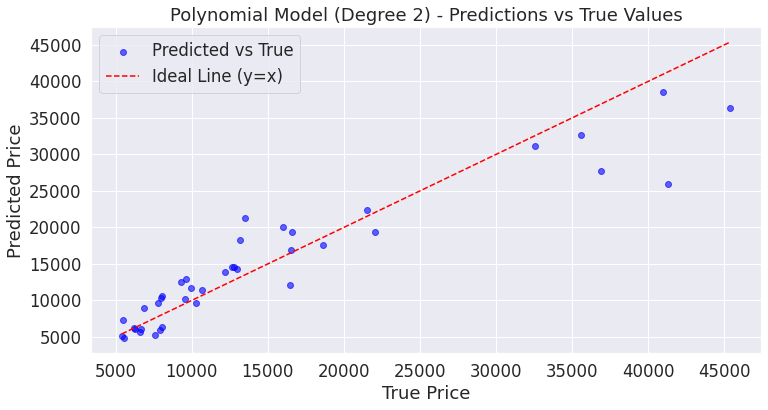

In [9]:
import matplotlib.pyplot as plt

# Convert tensors to numpy for plotting
y_test_np = y_test.cpu().numpy().flatten()
y_pred_np = y_pred.cpu().numpy().flatten()

# Plot the true vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test_np, y_pred_np, alpha=0.6, color='blue', label='Predicted vs True')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], color='red', linestyle='--', label='Ideal Line (y=x)')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title(f'Polynomial Model (Degree {degree}) - Predictions vs True Values')
plt.legend()
plt.grid(True)
plt.show()

